In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
file_path = "new_speeches_output.csv"
df = pd.read_csv(file_path)
df['Party'] = df['Party'].replace({'CDU': 'CDU/CSU', 'CSU': 'CDU/CSU', 'Univ Kyiv': 'CDU/CSU', 'UnivKyiv':'CDU/CSU', 'Erlangen':'CDU/CSU', 'BÜNDNIS 90/D': 'GRUENE', 'BÜNDNISSES 90/DIE GRÜNEN': 'GRUENE','BÜNDNIS 90/DIE GRÜNEN': 'GRUENE', 'BÜNDIS 90/DIE GRÜNEN': 'GRUENE', 'LINKEN': 'DIE LINKE', 'LINKE': 'DIE LINKE'})

df['Interjector Party'] = df['Interjector Party'].replace({'CDU': 'CDU/CSU', 'CSU': 'CDU/CSU', 'Univ Kyiv': 'CDU/CSU', 'UnivKyiv':'CDU/CSU', 'Erlangen':'CDU/CSU', 'BÜNDNIS 90/D': 'GRUENE', 'BÜNDNISSES 90/DIE GRÜNEN': 'GRUENE','BÜNDNIS 90/DIE GRÜNEN': 'GRUENE', 'BÜNDIS 90/DIE GRÜNEN': 'GRUENE', 'LINKEN': 'DIE LINKE', 'LINKE': 'DIE LINKE'})
verbal_interjections_df = df[df['Verbal interjection'] > 0]
nonverbal_interjections_df = df[df['Nonverbal interjection'] > 0]

Total paragraphs by gender per party:
Gender      männlich  weiblich
Party                         
AfD            40444      4648
CDU/CSU        66577     12643
DIE LINKE      15554     15252
Die PARTEI       266         0
FDP            26140      7835
GRUENE         13403     20101
LKR              843         0
SPD            33404     19488
parteilos       1764       576

Percentage of paragraphs by gender per party:
Gender        männlich   weiblich
Party                            
AfD          89.692185  10.307815
CDU/CSU      84.040646  15.959354
DIE LINKE    50.490164  49.509836
Die PARTEI  100.000000   0.000000
FDP          76.938926  23.061074
GRUENE       40.004179  59.995821
LKR         100.000000   0.000000
SPD          63.155109  36.844891
parteilos    75.384615  24.615385


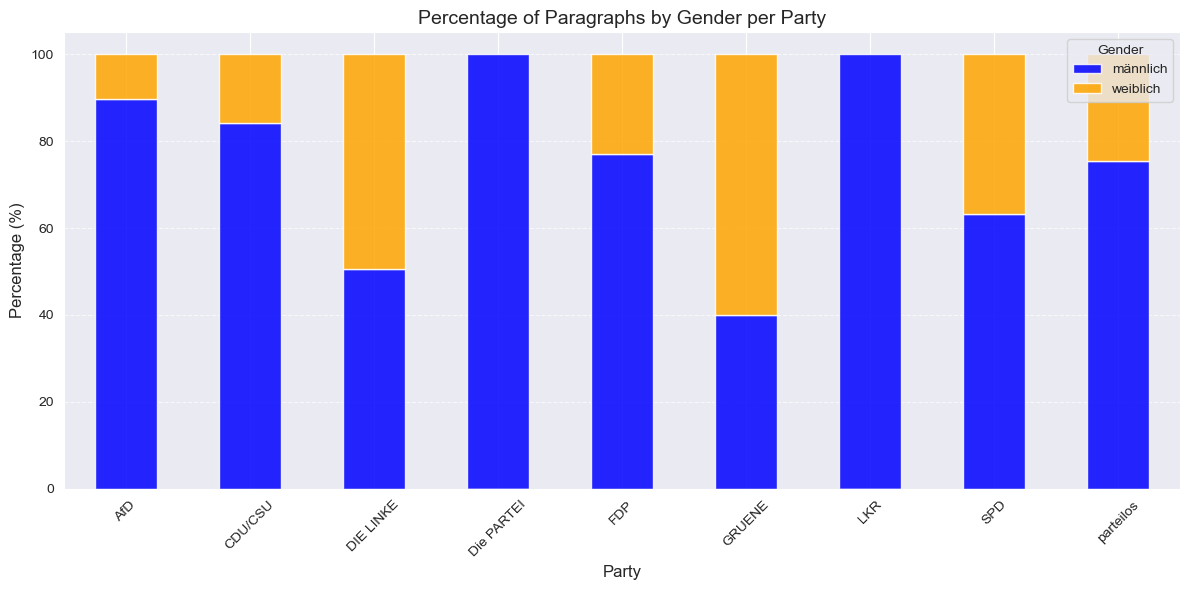

Num. paragraphs by male speakers: 198395 (70.38%)
Num. paragraphs by female speakers: 80543 (28.57%)
Total number of verbal interjections: 82573
Verbal interjections received by male speakers: 62403 (75.57%)
Verbal interjections received by female speakers: 19529 (23.65%)
Verbal interjections given by men: 50125 (60.70%)
Verbal interjections given by women: 22837 (27.66%)
Verbal interjections given by unknown: 9611 (11.64%)


In [9]:
# frauenanteil: 31%
#
paragraphs_df = df[df['Interjection'] == False]

paragraph_male = paragraphs_df[paragraphs_df['Gender'] == 'männlich'].shape[0]
paragraph_female = paragraphs_df[paragraphs_df['Gender'] == 'weiblich'].shape[0]

paragraphs_by_party_gender = paragraphs_df.groupby(['Party', 'Gender']).size().unstack(fill_value=0)

print("Total paragraphs by gender per party:")
print(paragraphs_by_party_gender)

paragraphs_by_party_gender_percentage = paragraphs_by_party_gender.div(paragraphs_by_party_gender.sum(axis=1), axis=0) * 100

print("\nPercentage of paragraphs by gender per party:")
print(paragraphs_by_party_gender_percentage)

paragraphs_by_party_gender_percentage.plot(
    kind='bar',
    stacked=True,
    figsize=(12, 6),
    color=['blue', 'orange'],
    alpha=0.85
)

plt.title('Percentage of Paragraphs by Gender per Party', fontsize=14)
plt.xlabel('Party', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Gender', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


# Calculate percentages
male_paragraph_percentage = (paragraph_male / len(paragraphs_df)) * 100
female_paragraph_percentage = (paragraph_female / len(paragraphs_df)) * 100

# Total verbal interjections
total_interjections = df['Verbal interjection'].sum()

# Total verbal interjections received by male and female speakers
total_male_speaker_interjections = df[df['Gender'] == 'männlich']['Verbal interjection'].sum()
total_female_speaker_interjections = df[df['Gender'] == 'weiblich']['Verbal interjection'].sum()

# Total verbal interjections given by male, female, and unknown interjectors
total_male_interjector = df[df['Interjector Gender'] == 'männlich']['Verbal interjection'].sum()
total_female_interjector = df[df['Interjector Gender'] == 'weiblich']['Verbal interjection'].sum()
total_unknown_interjector = total_interjections - total_male_interjector - total_female_interjector

# Print results
print(f"Num. paragraphs by male speakers: {paragraph_male} ({male_paragraph_percentage:.2f}%)")
print(f"Num. paragraphs by female speakers: {paragraph_female} ({female_paragraph_percentage:.2f}%)")

print(f"Total number of verbal interjections: {total_interjections}")

print(f"Verbal interjections received by male speakers: {total_male_speaker_interjections} ({total_male_speaker_interjections / total_interjections:.2%})")
print(f"Verbal interjections received by female speakers: {total_female_speaker_interjections} ({total_female_speaker_interjections / total_interjections:.2%})")
print(f"Verbal interjections given by men: {total_male_interjector} ({total_male_interjector / total_interjections:.2%})")
print(f"Verbal interjections given by women: {total_female_interjector} ({total_female_interjector / total_interjections:.2%})")
print(f"Verbal interjections given by unknown: {total_unknown_interjector} ({total_unknown_interjector / total_interjections:.2%})")


In [10]:
male_speaker_male_interjector = df[(df['Gender'] == 'männlich') & (df['Interjector Gender'] == 'männlich')]['Verbal interjection'].sum()
male_speaker_female_interjector = df[(df['Gender'] == 'männlich') & (df['Interjector Gender'] == 'weiblich')]['Verbal interjection'].sum()

print(f"Amount of interjections by male interjectors received by male speakers: {male_speaker_male_interjector} ({male_speaker_male_interjector/total_male_speaker_interjections})")
print(f"Amount of interjections by female interjectors received by male speakers: {male_speaker_female_interjector} ({male_speaker_female_interjector/total_male_speaker_interjections})")

female_speaker_male_interjector = df[(df['Gender'] == 'weiblich') & (df['Interjector Gender'] == 'männlich')]['Verbal interjection'].sum()
female_speaker_female_interjector = df[(df['Gender'] == 'weiblich') & (df['Interjector Gender'] == 'weiblich')]['Verbal interjection'].sum()

print(f"Amount of interjections by male interjectors received by female speakers: {female_speaker_male_interjector} ({female_speaker_male_interjector/total_female_speaker_interjections})")
print(f"Amount of interjections by female interjectors received by female speakers: {female_speaker_female_interjector} ({female_speaker_female_interjector/total_female_speaker_interjections})")

Amount of interjections by male interjectors received by male speakers: 37100 (0.5945226992292038)
Amount of interjections by female interjectors received by male speakers: 18145 (0.29077127702193806)
Amount of interjections by male interjectors received by female speakers: 12591 (0.6447334732961237)
Amount of interjections by female interjectors received by female speakers: 4554 (0.2331916636796559)


In [11]:
male_interjector_male_speaker = df[(df['Gender'] == 'männlich') & (df['Interjector Gender'] == 'männlich')]['Verbal interjection'].sum()
male_interjector_female_speaker = df[(df['Gender'] == 'weiblich') & (df['Interjector Gender'] == 'männlich')]['Verbal interjection'].sum()

print(f"Amount of interjections given by male interjectors to male speakers: {male_interjector_male_speaker} ({male_interjector_male_speaker/total_male_interjector})")
print(f"Amount of interjections given by male interjectors to female speakers: {male_interjector_female_speaker} ({male_interjector_female_speaker/total_male_interjector})")

female_interjector_male_speaker = df[(df['Gender'] == 'männlich') & (df['Interjector Gender'] == 'weiblich')]['Verbal interjection'].sum()
female_interjector_female_speaker = df[(df['Gender'] == 'weiblich') & (df['Interjector Gender'] == 'weiblich')]['Verbal interjection'].sum()

print(f"Amount of interjections given by female interjectors to male speakers: {female_interjector_male_speaker} ({female_interjector_male_speaker/total_female_interjector})")
print(f"Amount of interjections given by female interjectors to female speakers: {female_interjector_female_speaker} ({female_interjector_female_speaker/total_female_interjector})")

Amount of interjections given by male interjectors to male speakers: 37100 (0.7401496259351621)
Amount of interjections given by male interjectors to female speakers: 12591 (0.2511920199501247)
Amount of interjections given by female interjectors to male speakers: 18145 (0.7945439418487542)
Amount of interjections given by female interjectors to female speakers: 4554 (0.19941323291150326)


In [12]:
### LOOK at only nonverbal interjections
total_nonverbal_interjections = df['Nonverbal interjection'].sum()

# Total verbal interjections received by male and female speakers
total_male_speaker_nonverbal_interjections = df[df['Gender'] == 'männlich']['Nonverbal interjection'].sum()
total_female_speaker_nonverbal_interjections = df[df['Gender'] == 'weiblich']['Nonverbal interjection'].sum()

print(f"Total number of nonverbal interjections: {total_nonverbal_interjections}")

print(f"Nonverbal interjections received by male speakers: {total_male_speaker_nonverbal_interjections} ({total_male_speaker_nonverbal_interjections / total_nonverbal_interjections:.2%})")
print(f"Nonverbal interjections received by female speakers: {total_female_speaker_nonverbal_interjections} ({total_female_speaker_nonverbal_interjections / total_nonverbal_interjections:.2%})")


Total number of nonverbal interjections: 186293
Nonverbal interjections received by male speakers: 124203 (66.67%)
Nonverbal interjections received by female speakers: 60055 (32.24%)
